# Airbnb Rental Price Prediction San Francisco

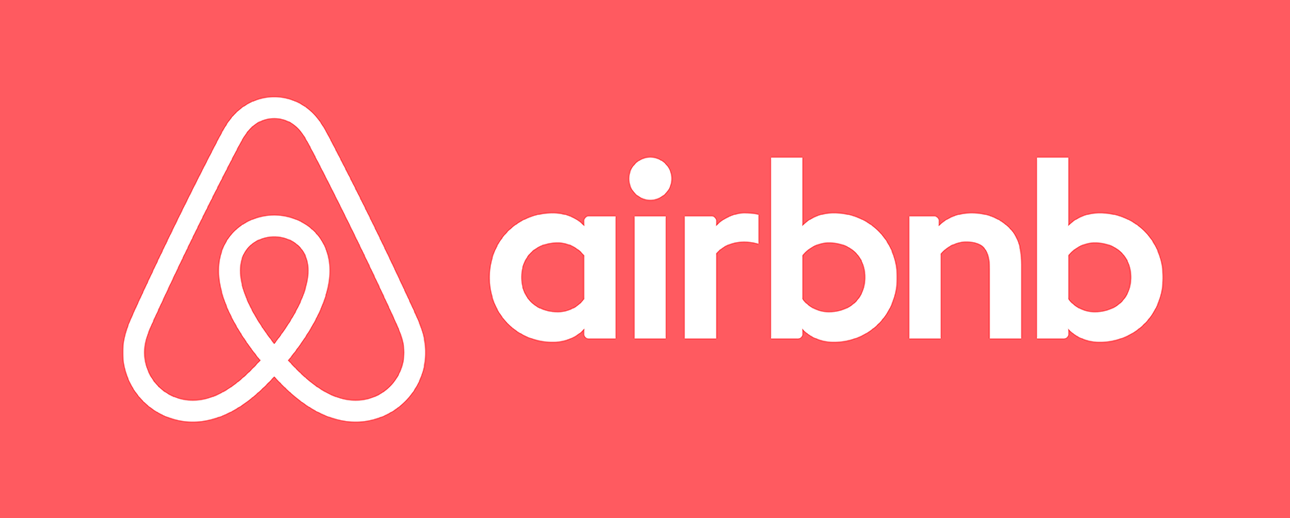

## Introduction

### Problem statement and importance

Airbnb is an **online marketplace** that connects people who want to rent out their homes with people who are looking for accommodations in specific locales. All avid travelers widely enjoy the platform for its access to holiday lets ranging from single rooms to entire properties, varying in quality and affordability, and offering a markedly different experience to that found in a hotel. 

In recent years the impact of Airbnb’s service on local economics and rental markets has come under the spotlight. In big cosmopoliton cities with a lot of tourism, landlords move their properties out of the long-term rentals and for-sale markets, and into the short-term rental market by turning their rooms and properties into short-term lets which offers an alternative and lucrative source of revenue. But the prices of these properties should be optimally set, given the demand, and other property-specific factors. This is where Airbnb price prediction comes into play. 

This is a supervised machine learning regression problem. We aim to build the best **Airbnb Price Prediction** model using linear regression, ridge regression, linear support vector regressors, k-nearest neighbours, and random forests. We also perform hyperparameter tuning to attain the best results for the models fit for our usecase. The performance of each of these models are evaluated and compared.

### About the Dataset

Inside Airbnb is an independent, non-commercial organization that collects scraped data that allows you to explore how Airbnb is being used in cities around the world. In this project, we aim to predict the prices for the rental marketplace company in San Francisco, California. 

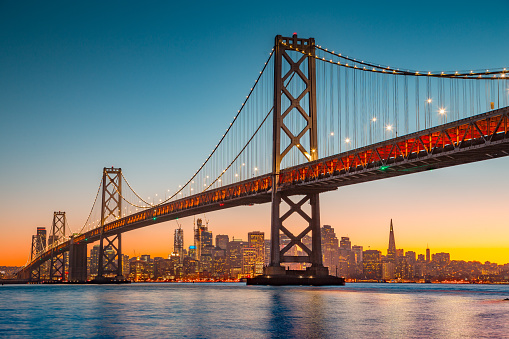 

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

# Runtime Configuration Parameters for Matplotlib

plt.rcParams['font.family'] = 'Verdana'
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Reading data
airbnb_df = pd.read_csv('listings.csv')
airbnb_df.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20211204142946,2021-12-04,"Bright, Modern Garden Unit - 1BR/1BTH",Please check local laws re Covid before you re...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,4.90,4.98,4.78,City Registration Pending,f,1,1,0,0,3.60
1,5858,https://www.airbnb.com/rooms/5858,20211204142946,2021-12-04,Creative Sanctuary,<b>The space</b><br />We live in a large Victo...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,https://www.airbnb.com/users/show/8904,...,4.85,4.77,4.68,NaN,f,1,1,0,0,0.76
2,7918,https://www.airbnb.com/rooms/7918,20211204142946,2021-12-04,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",https://a0.muscache.com/pictures/26356/8030652...,21994,https://www.airbnb.com/users/show/21994,...,4.60,4.73,4.00,NaN,f,9,0,9,0,0.17
3,8142,https://www.airbnb.com/rooms/8142,20211204142946,2021-12-04,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,NaN,https://a0.muscache.com/pictures/27832/3b1f9e5...,21994,https://www.airbnb.com/users/show/21994,...,4.75,4.63,4.63,NaN,f,9,0,9,0,0.10
4,8339,https://www.airbnb.com/rooms/8339,20211204142946,2021-12-04,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/213fbf05-3545...,24215,https://www.airbnb.com/users/show/24215,...,5.00,4.94,4.75,STR-0000264,f,2,2,0,0,0.19


### 1. Data Cleaning

In [3]:
# Features
airbnb_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

#### 1.1 Dropping features that do not contribute to prediction

In [4]:
# Drop features that do not contribute to the prediction

del_cols = ['name','host_name','listing_url','scrape_id', 'last_scraped', 'description', 'neighborhood_overview', 'picture_url', 'host_url',
            'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 
            'host_is_superhost' , 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count',
            'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_group_cleansed',
            'room_type', 'bathrooms', 'bathrooms_text', 'bedrooms', 'amenities', 'minimum_minimum_nights', 'maximum_minimum_nights',
            'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
            'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'calendar_last_scraped',
            'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
            'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'instant_bookable',
            'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 
            'calculated_host_listings_count_shared_rooms']

airbnb_df = airbnb_df.drop(del_cols, axis = 1)

In [5]:
# Checking data type
airbnb_df.dtypes

id                             int64
host_id                        int64
host_since                    object
host_total_listings_count    float64
neighbourhood_cleansed        object
latitude                     float64
longitude                    float64
property_type                 object
accommodates                   int64
beds                         float64
price                         object
minimum_nights                 int64
maximum_nights                 int64
availability_365               int64
number_of_reviews              int64
number_of_reviews_ltm          int64
first_review                  object
last_review                   object
reviews_per_month            float64
dtype: object

#### 1.2 Parsing dates

In [6]:
# Converting host_since, first_review, last_review data type from object to datetime

airbnb_df['host_since'] = pd.to_datetime(airbnb_df['host_since'])
airbnb_df['first_review'] = pd.to_datetime(airbnb_df['first_review'])
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'])

In [7]:
# Renaming neighbourhood_cleansed to neighbourhood

airbnb_df = airbnb_df.rename(columns={"neighbourhood_cleansed": "neighbourhood"})

In [8]:
# Total features and observations

print('Number of features: ', airbnb_df.shape[1])
print('Number of observations: ', airbnb_df.shape[0])

Number of features:  19
Number of observations:  6413


In [9]:
# Checking data type after datatime conversion
airbnb_df.dtypes

id                                    int64
host_id                               int64
host_since                   datetime64[ns]
host_total_listings_count           float64
neighbourhood                        object
latitude                            float64
longitude                           float64
property_type                        object
accommodates                          int64
beds                                float64
price                                object
minimum_nights                        int64
maximum_nights                        int64
availability_365                      int64
number_of_reviews                     int64
number_of_reviews_ltm                 int64
first_review                 datetime64[ns]
last_review                  datetime64[ns]
reviews_per_month                   float64
dtype: object

### 2. Feature Engineering

#### 2.1 Missing value treatment

In [10]:
# Missing value inspection

def missing_values(df):
    total_null = df.isna().sum()
    percent_null = df.isna().sum() / df.isna().count()
    missing_data = pd.concat([total_null, percent_null], axis = 1, keys = ['Total missing values', 'Percentage missing values']).sort_values('Total missing values', ascending = False)
    return missing_data

In [11]:
missing_values(airbnb_df)

,Total missing values,Percentage missing values
reviews_per_month,1336,0.208327
first_review,1336,0.208327
last_review,1336,0.208327
beds,310,0.048339
host_total_listings_count,14,0.002183
host_since,14,0.002183
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
property_type,0,0.000000


In [12]:
# Fill NAs with 0 for reviews_per_month, beds

airbnb_df['reviews_per_month'] = airbnb_df['reviews_per_month'].fillna(0)
airbnb_df['beds'] = airbnb_df['beds'].fillna(0)

# Drop host_total_listings_count with NaN entries

airbnb_df = airbnb_df[airbnb_df['host_total_listings_count'].notna()]

#### 2.2 Wrangling

In [13]:
# Create new column to convert last_review to last_review_since_listing, i.e. no. of days
airbnb_df['last_review_since_listing'] = abs(airbnb_df['last_review'] - airbnb_df['host_since']).dt.days

# Create new column to convert first_review to first_review_since_listing, i.e. no. of days
airbnb_df['first_review_since_listing'] = abs(airbnb_df['first_review'] - airbnb_df['host_since']).dt.days

In [14]:
# Dropping columns with dates

del_cols2 = ['host_since', 'first_review', 'last_review']
airbnb_df = airbnb_df.drop(del_cols2, axis = 1)
airbnb_df.head(5)

,id,host_id,host_total_listings_count,neighbourhood,latitude,longitude,property_type,accommodates,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,number_of_reviews_ltm,reviews_per_month,last_review_since_listing,first_review_since_listing
0,958,1169,1.0,Western Addition,37.77028,-122.43317,Entire serviced apartment,3,2.0,$161.00,2,30,126,314,43,3.60,4859.0,2257.0
1,5858,8904,2.0,Bernal Heights,37.74474,-122.42089,Entire rental unit,5,3.0,$235.00,30,60,365,111,0,0.76,2370.0,267.0
2,7918,21994,10.0,Haight Ashbury,37.76555,-122.45213,Private room in rental unit,2,1.0,$56.00,32,60,365,19,0,0.17,3915.0,1167.0
3,8142,21994,10.0,Haight Ashbury,37.76555,-122.45213,Private room in rental unit,2,1.0,$56.00,32,90,365,8,0,0.10,2978.0,2085.0
4,8339,24215,2.0,Western Addition,37.77564,-122.43642,Entire condominium (condo),4,2.0,$895.00,7,111,364,28,0,0.19,3648.0,85.0


In [15]:
# Fill NAs with 0 for first_review_since_listing, last_review_since_listing

airbnb_df['first_review_since_listing'] = airbnb_df['first_review_since_listing'].fillna(0)
airbnb_df['last_review_since_listing'] = airbnb_df['last_review_since_listing'].fillna(0)

In [16]:
# Review missing value information

missing_values(airbnb_df)

,Total missing values,Percentage missing values
id,0,0.0
host_id,0,0.0
last_review_since_listing,0,0.0
reviews_per_month,0,0.0
number_of_reviews_ltm,0,0.0
number_of_reviews,0,0.0
availability_365,0,0.0
maximum_nights,0,0.0
minimum_nights,0,0.0
price,0,0.0


In [17]:
# Strip special charachter '$' and ',' from target variable 'price'

airbnb_df['price'] = airbnb_df['price'].str.strip('$')
airbnb_df['price'] = airbnb_df['price'].str.replace(',','')
airbnb_df['price'] = airbnb_df['price'].astype(float)

In [18]:
airbnb_df.dtypes

id                              int64
host_id                         int64
host_total_listings_count     float64
neighbourhood                  object
latitude                      float64
longitude                     float64
property_type                  object
accommodates                    int64
beds                          float64
price                         float64
minimum_nights                  int64
maximum_nights                  int64
availability_365                int64
number_of_reviews               int64
number_of_reviews_ltm           int64
reviews_per_month             float64
last_review_since_listing     float64
first_review_since_listing    float64
dtype: object

Text(0.5, 1.0, 'Correlation Matrix')

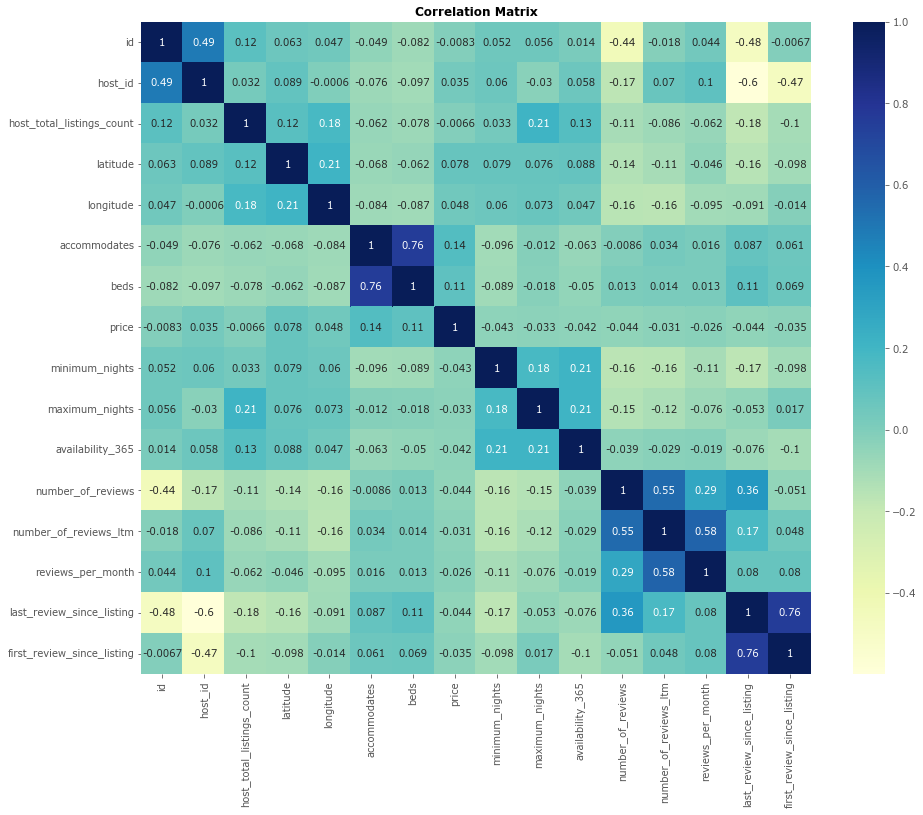

In [19]:
# Plotting the pearson correlation plot to visualise the correlation between various features

# Correlation 
correlation_matrix = airbnb_df.corr(method = 'pearson')
plt.subplots(figsize=(15,12))

# Heatmap
sns.heatmap(correlation_matrix, annot = True, cmap = "YlGnBu")
plt.title("Correlation Matrix", size = 12, weight = 'bold')

In [20]:
# Dropping highly correlated features

airbnb_df = airbnb_df.drop(['number_of_reviews_ltm'], axis = 1)
airbnb_df.head(5)

,id,host_id,host_total_listings_count,neighbourhood,latitude,longitude,property_type,accommodates,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,reviews_per_month,last_review_since_listing,first_review_since_listing
0,958,1169,1.0,Western Addition,37.77028,-122.43317,Entire serviced apartment,3,2.0,161.0,2,30,126,314,3.60,4859.0,2257.0
1,5858,8904,2.0,Bernal Heights,37.74474,-122.42089,Entire rental unit,5,3.0,235.0,30,60,365,111,0.76,2370.0,267.0
2,7918,21994,10.0,Haight Ashbury,37.76555,-122.45213,Private room in rental unit,2,1.0,56.0,32,60,365,19,0.17,3915.0,1167.0
3,8142,21994,10.0,Haight Ashbury,37.76555,-122.45213,Private room in rental unit,2,1.0,56.0,32,90,365,8,0.10,2978.0,2085.0
4,8339,24215,2.0,Western Addition,37.77564,-122.43642,Entire condominium (condo),4,2.0,895.0,7,111,364,28,0.19,3648.0,85.0


#### 2.3 Processing highly cardinal features

In [21]:
# Count of distinct values in property_type and neighbourhood

print('Distinct property types in SFO: ', airbnb_df['property_type'].nunique())
print('Distinct neighbourhoods in SFO: ', airbnb_df['neighbourhood'].nunique())

Distinct property types in SFO:  52
Distinct neighbourhoods in SFO:  36


In [22]:
# 20 property types based on popularity

prop20 = airbnb_df['property_type'].value_counts()[:20].index 
# value_counts() returns most frequest values in descending order

# if NOT(~) in prop16 then replace value of the property_types as "Others"
airbnb_df.loc[~airbnb_df['property_type'].isin(prop20), 'property_type'] = "Others"

### 3. Exploratory Data Analysis

#### 3.1 Analyzing number of hosts in SFO vs number of properties

In [23]:
# Number of unique hosts and number of properties

no_of_hosts = len(airbnb_df['host_id'].unique())
no_of_props = airbnb_df.shape[0]

print('Number of unique hosts in SFO: ', no_of_hosts)
print('Number of properties in SFO: ', no_of_props)

Number of unique hosts in SFO:  3361
Number of properties in SFO:  6399


#### 3.2 Analyzing popular neighbourhoods

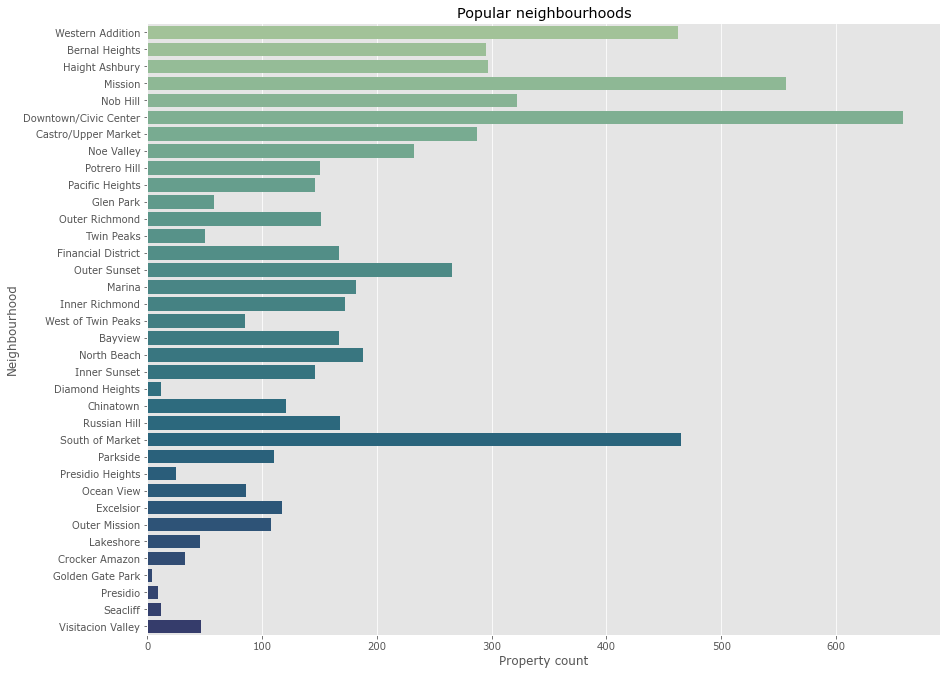

In [24]:
# Understanding the neighbourhood with categorical plots
sns.catplot(y="neighbourhood", kind="count", data=airbnb_df, palette = 'crest')
# Labelling
plt.title('Popular neighbourhoods')
plt.xlabel('Property count')
plt.ylabel('Neighbourhood')
# Set size for plot
fig = plt.gcf()
fig.set_size_inches(20,10)

We look at the neighbourhoods with the maximum number of properties. Downtown/Civic Center, Mission, Western Addition and South of Market are the most popular neighbourhoods in San Francisco. 

#### 3.3 Analyzing popular property types

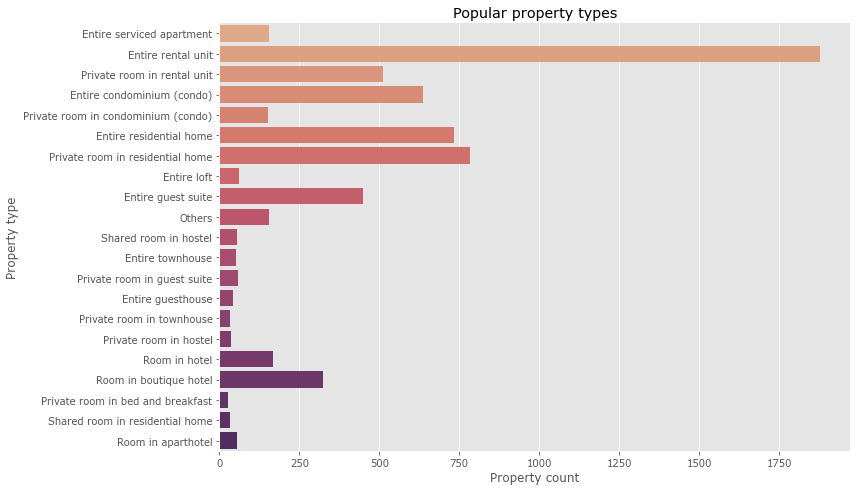

In [25]:
# Understanding the property types with categorical plots
sns.catplot(y="property_type", kind="count", data=airbnb_df, palette = 'flare')
# Labelling
plt.title('Popular property types')
plt.xlabel('Property count')
plt.ylabel('Property type')
# Setting size of plot
fig = plt.gcf()
fig.set_size_inches(25,7)

Most popular form of properties:
- Entire rental unit
- Private room in residential home
- Entire residential home
- Entire condo
- Private room in rental unit

#### 3.4 Analyzing skewness of features

In [26]:
# Numerical columns
cols = ['latitude', 'longitude', 'accommodates', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'availability_365', 'reviews_per_month', 'last_review_since_listing', 'first_review_since_listing']

# Function to define skewness
def skew_analysis(df):
    print('--Skewness measure--\n')
    for col in cols:
        print(f'{col}:', df[col].skew())

In [27]:
# Skewness for airbnb_dataframe
skew_analysis(airbnb_df)

--Skewness measure--

latitude: -0.5045730819776347
longitude: -0.9979895712398169
accommodates: 1.7168287791795542
beds: 2.3487956359561695
price: 27.12073940697777
minimum_nights: 7.902945499412712
maximum_nights: 2.8157607807977136
availability_365: 0.1709119430819419
reviews_per_month: 13.592847669491864
last_review_since_listing: 0.07638515696940891
first_review_since_listing: 0.7962900434467812


The skewness for the target variable **price** is highly skewed with a value of 27.12. One of the predictor variables, **reviews_per_month** is also highly skewed with a value of 13.59. 

We can tackle this problem by `handling outliers`, or by `Log transformation`.

##### 3.4.1 Price

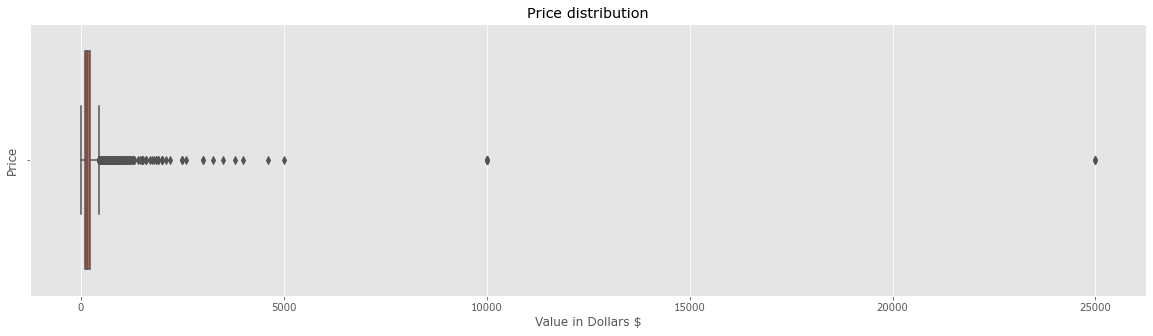

In [28]:
# Boxplot for 'price' target variable
sns.boxplot(x = 'price', data = airbnb_df)
plt.title('Price distribution')
plt.xlabel('Value in Dollars $')
plt.ylabel('Price')
fig = plt.gcf()
fig.set_size_inches(20,5)

As per the above boxplot, there are a lot of outliers present in our dataset, which can easily influence our prediction. We now look at the boxplot at a more granular level by limiting the x-axis values.

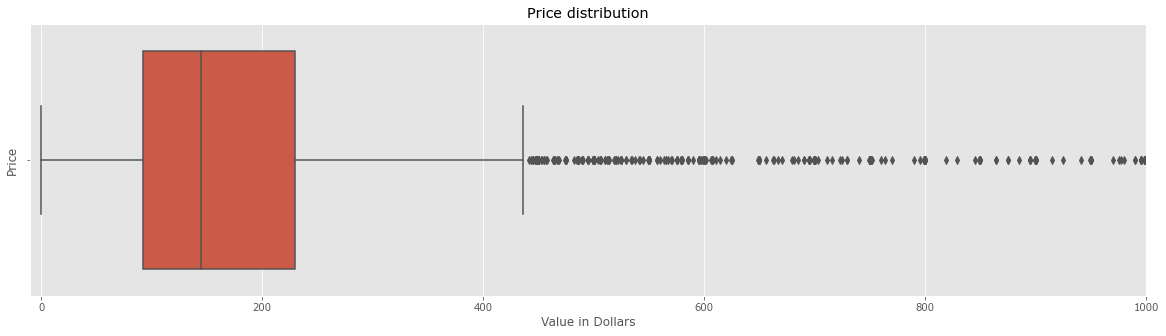

In [29]:
# Boxplot for 'price' < 1000
sns.boxplot(x = 'price', data = airbnb_df)
# Limiting x values to ignore outliers
plt.xlim(-10,1000)
# Plot labelling
plt.title('Price distribution')
plt.xlabel('Value in Dollars')
plt.ylabel('Price')
# Setting size of plot
fig = plt.gcf()
fig.set_size_inches(20,5)

In [30]:
# Calculating the IQR value and fence of boxplot
Q1 = airbnb_df.price.quantile(0.25)
Q3 = airbnb_df.price.quantile(0.75)

# Inter-quartile range
IQR = Q3 - Q1

# Min, max, lower fence and upper fence
print('Min: ', airbnb_df.price.min())
print('Max: ', airbnb_df.price.max())
print('Lower fence: ', Q1 - (1.5 * IQR))
print('Upper fence: ', Q3 + (1.5 * IQR)) 

Min:  0.0
Max:  25000.0
Lower fence:  -115.0
Upper fence:  437.0


In [31]:
# Dropping rows with price > $ 437 
airbnb_df = airbnb_df.loc[ airbnb_df.price < 437 ]

In [32]:
# Checking skew of target variable after outlier handling
airbnb_df.price.skew()

0.9735071414922187

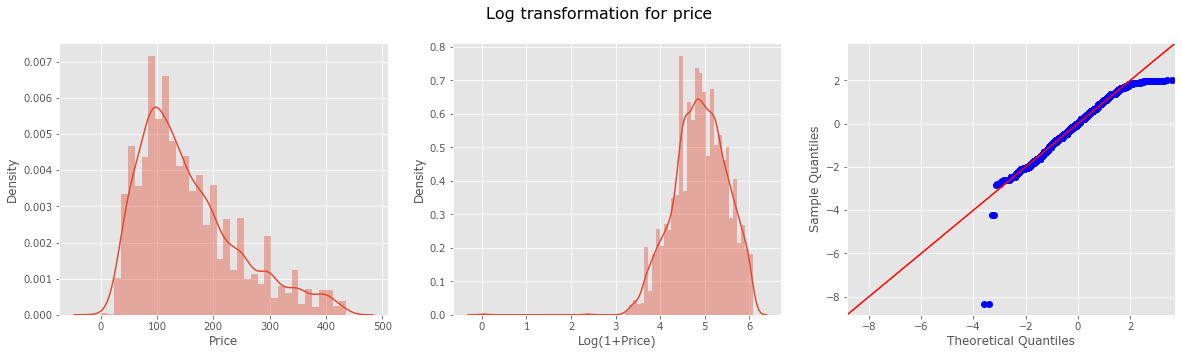

In [33]:
# Plotting 'price' target variable
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
fig.suptitle('Log transformation for price', fontsize=16)

# Distribution of price, after outlier handling
sns.distplot(airbnb_df.price, kde=True, bins='auto', ax = ax[0])
ax[0].set_xlabel('Price')

# Log transformation and handling neg values with log(1+x)
sns.distplot(np.log1p(airbnb_df.price), kde=True, bins='auto', ax = ax[1])
ax[1].set_xlabel('Log(1+Price)')

# QQ plot to check is the log transformation makes the variable normal or not
sm.qqplot(np.log1p(airbnb_df.price), fit=True, line='45', ax=ax[2]);

In [34]:
# Checking skew after log transformation
np.log1p(airbnb_df.price).skew()

-0.3954313581704041

We were able to bring down the skew even further to -0.39 using a Log transform on our target variable. 

In [35]:
# Replacing price with log-transformed values
airbnb_df.price = np.log1p(airbnb_df.price)

##### 3.4.2 Reviews per month

We also note a high level of skewness in `reviews_per_month` with a value of 13.59. 

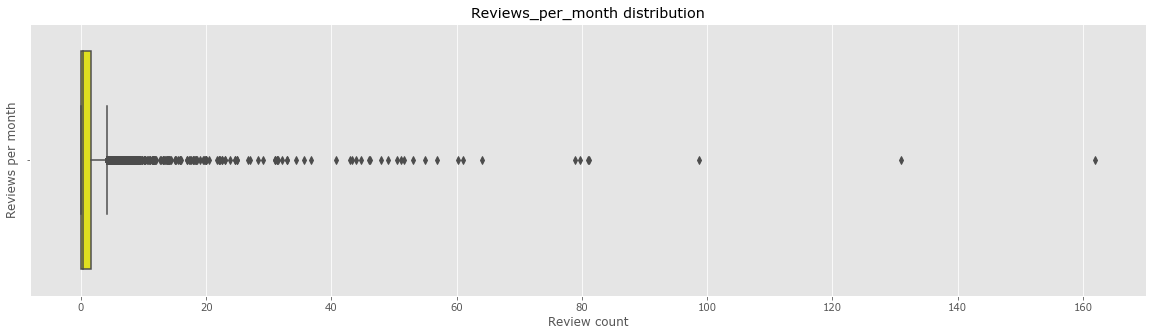

In [36]:
# Boxplot for 'reviews_per_month' target variable
sns.boxplot(x = 'reviews_per_month', data = airbnb_df, color = "yellow")
# Labelling
plt.title('Reviews_per_month distribution')
plt.xlabel('Review count')
plt.ylabel('Reviews per month')
# Setting size of pot
fig = plt.gcf()
fig.set_size_inches(20,5)

We note that there are a lot of outliers in the `reviews_per_month` predictor variable. Another interesting thing to note is that more properties have less reviews, whereas only few properties have more reviews. It could possibly be because of their availability throughout the year. 

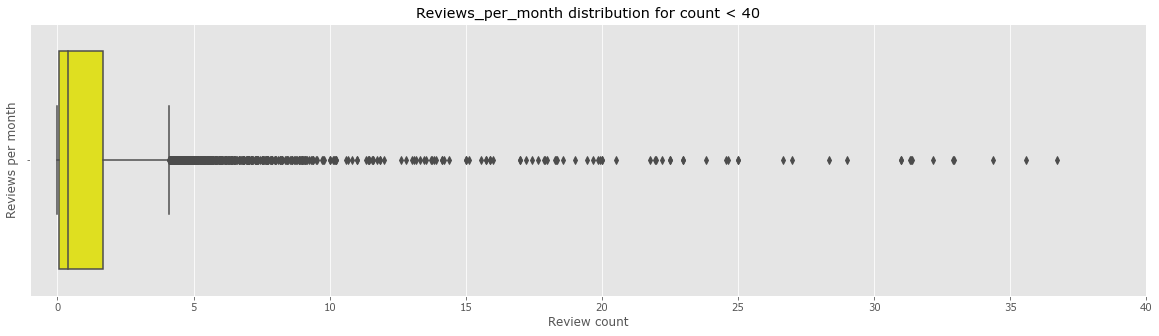

In [37]:
# Boxplot for 'reviews_per_month' target variable
sns.boxplot(x = 'reviews_per_month', data = airbnb_df, color = "yellow")
# Labelling
plt.title('Reviews_per_month distribution for count < 40')
plt.xlabel('Review count')
plt.ylabel('Reviews per month')
# Limiting x
plt.xlim(-1,40)
# Setting size of plot
fig = plt.gcf()
fig.set_size_inches(20,5)

In [38]:
# Calculating the IQR value and fence of boxplot
Q1 = airbnb_df.reviews_per_month.quantile(0.25)
Q3 = airbnb_df.reviews_per_month.quantile(0.75)

# Inter-quartile range
IQR = Q3 - Q1

# Min, max, lower fence and upper fence
print('Min: ', airbnb_df.reviews_per_month.min())
print('Max: ', airbnb_df.reviews_per_month.max())
print('Lower fence: ', Q1 - (1.5 * IQR))
print('Upper fence: ', Q3 + (1.5 * IQR)) 

Min:  0.0
Max:  162.0
Lower fence:  -2.38
Upper fence:  4.1


In [39]:
# Dropping rows with reviews_per_month > 30
airbnb_df = airbnb_df.loc[ airbnb_df.reviews_per_month < 30 ]

In [40]:
# Checking skew after log transformation
np.log1p(airbnb_df.reviews_per_month).skew()

1.2553339031899686

(0.0, 5.0)

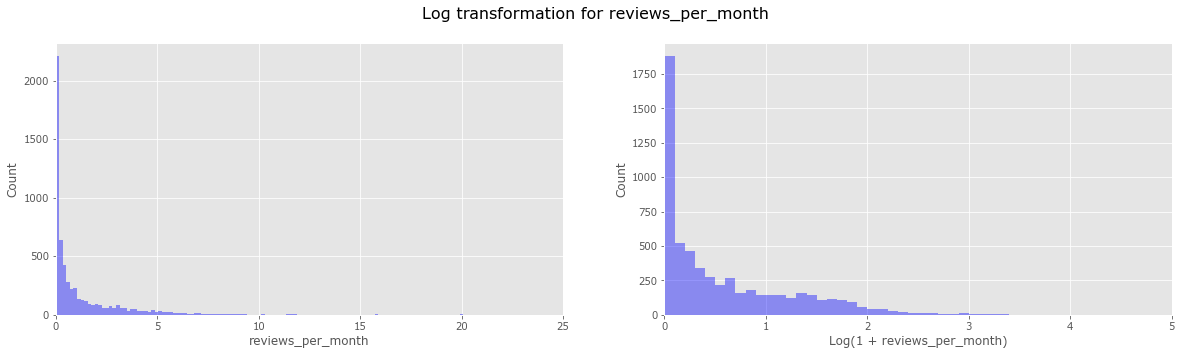

In [41]:
# Plotting 'price' target variable
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
fig.suptitle('Log transformation for reviews_per_month', fontsize=16)

# Distribution of price, after outlier handling
sns.distplot(airbnb_df.reviews_per_month, kde=False, bins='auto', ax = ax[0], color = 'blue')
ax[0].set_xlabel('reviews_per_month')
ax[0].set_ylabel('Count')
ax[0].set_xlim(0,25)

# Log transformation and handling neg values with log(1+x)
sns.distplot(np.log1p(airbnb_df.reviews_per_month), kde=False, bins='auto', ax = ax[1], color = 'blue')
ax[1].set_xlabel('Log(1 + reviews_per_month)')
ax[1].set_ylabel('Count')
ax[1].set_xlim(0,5)

We were able to bring down the skewness in `reviews_per_month` to 1.25.

#### 3.5 Neighbourhood cluster by latitude and longitude

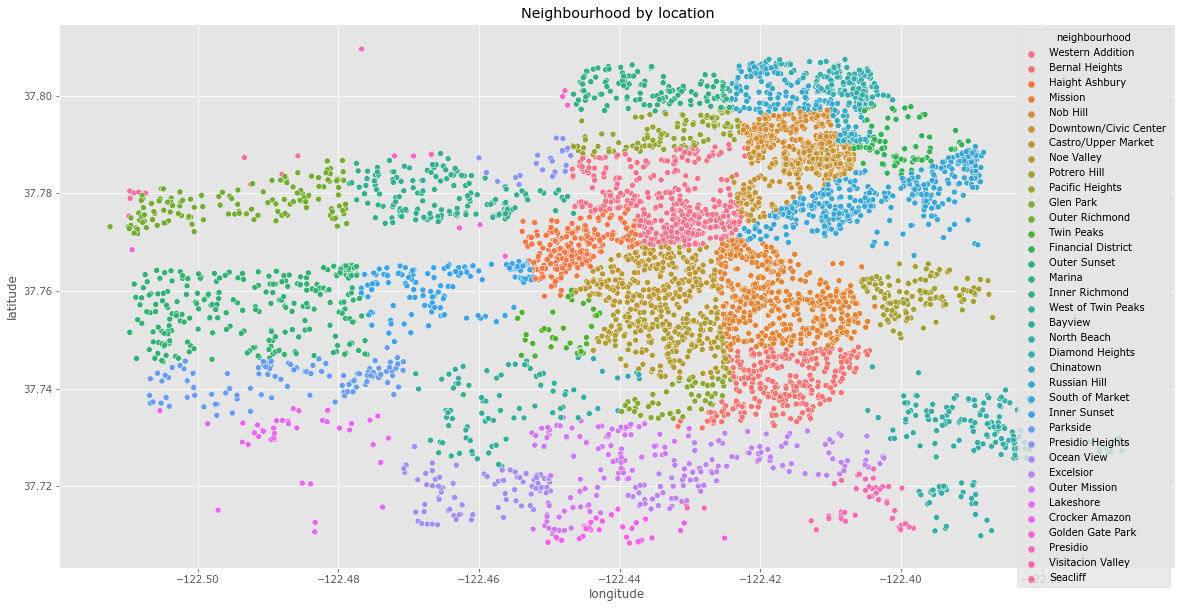

In [42]:
# Scatter plot for neighborhood by location
sns.scatterplot(x = airbnb_df.longitude, y = airbnb_df.latitude, hue = airbnb_df.neighbourhood)
plt.title('Neighbourhood by location')
fig = plt.gcf()
fig.set_size_inches(20,10)

#### 3.6 One-hot-encoding for categorical variables

In [43]:
# Include categorical features with 'object' datatype
cat_vars = airbnb_df.select_dtypes(include = ['object'])
cat_vars_one_hot_encode = pd.get_dummies(cat_vars)
cat_vars_one_hot_encode.head()

,neighbourhood_Bayview,neighbourhood_Bernal Heights,neighbourhood_Castro/Upper Market,neighbourhood_Chinatown,neighbourhood_Crocker Amazon,neighbourhood_Diamond Heights,neighbourhood_Downtown/Civic Center,neighbourhood_Excelsior,neighbourhood_Financial District,neighbourhood_Glen Park,...,property_type_Private room in guest suite,property_type_Private room in hostel,property_type_Private room in rental unit,property_type_Private room in residential home,property_type_Private room in townhouse,property_type_Room in aparthotel,property_type_Room in boutique hotel,property_type_Room in hotel,property_type_Shared room in hostel,property_type_Shared room in residential home
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# Include numerical features, exclude 'object' datatype features
numerical_vars = airbnb_df.select_dtypes(exclude = 'object')

# Set target variable
y = numerical_vars.price

# Drop 'price' feature
numerical_vars = numerical_vars.drop(['price'], axis = 1)

In [45]:
# Concatenate to build new dataframe as X that will be used for train-test split
X = pd.concat([numerical_vars, cat_vars_one_hot_encode], axis = 1)
X.head()

,id,host_id,host_total_listings_count,latitude,longitude,accommodates,beds,minimum_nights,maximum_nights,availability_365,...,property_type_Private room in guest suite,property_type_Private room in hostel,property_type_Private room in rental unit,property_type_Private room in residential home,property_type_Private room in townhouse,property_type_Room in aparthotel,property_type_Room in boutique hotel,property_type_Room in hotel,property_type_Shared room in hostel,property_type_Shared room in residential home
0,958,1169,1.0,37.77028,-122.43317,3,2.0,2,30,126,...,0,0,0,0,0,0,0,0,0,0
1,5858,8904,2.0,37.74474,-122.42089,5,3.0,30,60,365,...,0,0,0,0,0,0,0,0,0,0
2,7918,21994,10.0,37.76555,-122.45213,2,1.0,32,60,365,...,0,0,1,0,0,0,0,0,0,0
3,8142,21994,10.0,37.76555,-122.45213,2,1.0,32,90,365,...,0,0,1,0,0,0,0,0,0,0
5,8739,7149,2.0,37.76030,-122.42197,3,1.0,13,14,171,...,0,0,0,0,0,0,0,0,0,0


### 4. Model selection and train-test split

We aim to build the best **Airbnb Price Prediction model** using linear regression, ridge regression, linear support vector regressors, k-nearest neighbours, and random forests. We also perform hyperparameter tuning to attain the best results for the models fit for our usecase. The performance of each of these models are evaluated and compared.

In [46]:
# Importing libraries for modeling from sklearn

# Scaler
from sklearn.preprocessing import RobustScaler, StandardScaler
# Dataset splitting, cross validation, hyperparamter tuning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedKFold
# Ridge regression with built-in cross validation
from sklearn.linear_model import LinearRegression, Ridge
# Random forest
from sklearn.ensemble import RandomForestRegressor
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# Linear Support Vector Regressors
from sklearn.svm import LinearSVR
# K-nearest neighbors
from sklearn.neighbors import KNeighborsRegressor
# Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

#### 4.1 Train-Test split

In [47]:
# train size 75%, test size 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [48]:
# Checking dimensions of the test and training matrix and target vector
print('--DIMENSIONS AFTER TRAIN-TEST SPLIT--')

# X_train
print(f'X_train shape: {X_train.shape}')
# y_train
print(f'y_train shape: {y_train.shape}')
# X_test
print(f'X_test shape: {X_test.shape}')
# y_test
print(f'y_test shape: {y_test.shape}')

--DIMENSIONS AFTER TRAIN-TEST SPLIT--
X_train shape: (4407, 71)
y_train shape: (4407,)
X_test shape: (1469, 71)
y_test shape: (1469,)


Standardization, scaling and normalization are a common requirement for many machine learning models. Each predictor should have a mean of zero and unit variance, but is often swayed due to the presence of outliers. Our predictor matrices have a lot of outliers as per the box-plots above. The most suitable scaler for our use-case is RobustScaler(), as we need to scale the features to make it robust to outliers. RobustScaler() is similar to normalization, but it instead uses the interquartile (IQR) range and doesn't take the median into account. 

In [49]:
# Scaling with RobustScaler()
robust_scaler = RobustScaler()

# Transforming train and test predictor matrices
X_train = robust_scaler.fit_transform(X_train)
X_test = robust_scaler.fit_transform(X_test)

#### 4.2 Linear Regression

In [50]:
# Fitting linear regressor
lin_model = LinearRegression()
lin_reg = lin_model.fit(X_train, y_train)

# Predict
lin_y_pred = lin_reg.predict(X_test)

# R2 score
print('Linear regression R2-score: ', r2_score(y_test, lin_y_pred))

# RMSE
print('Linear regression root-mean-squared-error: ', mean_squared_error(y_test, lin_y_pred, squared=False))

Linear regression R2-score:  0.5518808717918734
Linear regression root-mean-squared-error:  0.3914471108612438


Linear regression assumes a linear relationship between predictor and target variables, which makes it very oversimplified for a real-world problem. It is not well suited for our problem.

#### 4.3 Ridge Regression

Now, we use **Ridge Regression** which is a special case of regression which is normally used in datasets which have multicollinearity. This method performs L2 regularization. We do have high number of features and the data may suffer from high multicollinearity. 

In [51]:
# Ridge regression model
ridge_model = Ridge()
ridge_reg = ridge_model.fit(X_train, y_train)

# Predict
ridge_y_pred = ridge_reg.predict(X_test)

# R2 score
print('Ridge regression R2-score: ', r2_score(y_test, ridge_y_pred))

# RMSE
print('Ridge regression root-mean-squared-error: ', mean_squared_error(y_test, ridge_y_pred, squared=False))

Ridge regression R2-score:  0.5521136139478621
Ridge regression root-mean-squared-error:  0.3913454436131109


##### 4.3.1 Ridge Regression with Hyperparamter tuning

The scores for Ridge Regression are not so much better than Linear Regression. Now we perform hyperparameter tuning for Ridge Regression, along with cross validation as an attempt to improve the performance of the model.

In [52]:
# Defining paramters for hyperparameter tuning
# alpha is the hyperparameter for ridge, we set it as a list to find the optimal value of alpha using gridsearchCV
param = {
            'alpha':[0.0001, 0.001, 0.01, 0.1, 1],
            'fit_intercept':[True,False],
            'normalize':[True,False],
            'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
        }

# Cross-validation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

# Define search
search = GridSearchCV(ridge_model, param, scoring='r2', n_jobs=-1, cv=cv)

# Execute search on scaled predictor matrix
# X_scaled = robust_scaler.fit_transform(X)
result = search.fit(X_train, y_train)

# Summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.508324808846515
Best Hyperparameters: {'alpha': 1, 'fit_intercept': True, 'normalize': False, 'solver': 'auto'}


We now add the above best parameters into Ridge Regression model and see the output once again.

In [53]:
# Ridge regression model
ridge_model = Ridge(alpha = 1, fit_intercept= True, normalize = False, solver ='auto')
ridge_reg = ridge_model.fit(X_train, y_train)

# Predict
ridge_y_pred = ridge_reg.predict(X_test)

# R2 score
print('Hyperparameter tuned Ridge regression R2-score: ', r2_score(y_test, ridge_y_pred))
# RMSE
print('Hyperparameter tuned Ridge regression root-mean-squared-error: ', mean_squared_error(y_test, ridge_y_pred, squared=False))

Hyperparameter tuned Ridge regression R2-score:  0.5521136139478621
Hyperparameter tuned Ridge regression root-mean-squared-error:  0.3913454436131109


##### 4.3.2 Ridge Regression with RidgeCV

We also try the **RidgeCV** model, which implements ridge regression with built-in cross-validation of alpha parameter. It almost works in same way except it defaults to Leave-One-Out cross validation.

In [54]:
from sklearn.linear_model import RidgeCV

# Ridge regression model with RidgeCV
ridgecv_reg = RidgeCV(alphas=[0.001, 0.001, 0.1, 1]).fit(X_train, y_train)
ridgecv_pred = ridgecv_reg.predict(X_test)

# R2 score
print('RidgeCV regression R2-score: ', r2_score(y_test, ridgecv_pred))

# RMSE
print('RidgeCV regression root-mean-squared-error: ', mean_squared_error(y_test, ridgecv_pred, squared=False))

RidgeCV regression R2-score:  0.5521136139142839
RidgeCV regression root-mean-squared-error:  0.39134544362778056


#### 4.4 Linear Support Vector Regressor with Hyperparameter tuning

We now use Linear Support Vector Regressor. In simple regression, we try to minimize the error rate. While in SVR we try to fit the error within a certain threshold. SVR gives us the flexibility to define how much error is acceptable in our model and will find an appropriate line (or hyperplane in higher dimensions) to fit the data.

In [55]:
# GridSearch for SVR to find the best hyperparameter 'C'
# Values to try for C = [0.0001, 0.001, 0.001, 0.1, 1]
# Cross validation of 3 fold
grid_search_svr = GridSearchCV(LinearSVR(max_iter = 1000000), {'C': [0.0001, 0.001, 0.001, 0.1, 1]}, cv = 3, n_jobs = -1)

# Fit
grid_search_svr.fit(X_train, y_train)

# Summarize result
print('Best Score: %s' % grid_search_svr.best_score_)
print('Best Hyperparameters: %s' % grid_search_svr.best_params_)

Best Score: 0.4895980710491555
Best Hyperparameters: {'C': 1}


We now add the above best parameters into LinearSVR model and see the output once again.

In [69]:
# Linear SVR regression model
svr_model = LinearSVR(C = 1)
svr_reg = svr_model.fit(X_train, y_train)

# Predict
svr_y_pred = svr_reg.predict(X_test)

# R2 score
print('Hyperparameter tuned Linear SVR R2-score: ', r2_score(y_test, svr_y_pred))

# RMSE
print('Hyperparameter tuned Linear SVR root-mean-squared-error: ', mean_squared_error(y_test, svr_y_pred, squared=False))

Hyperparameter tuned Linear SVR R2-score:  0.49406326582725535
Hyperparameter tuned Linear SVR root-mean-squared-error:  0.415934033218077


C:\Users\krish\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### 4.5 K-nearest neighbours with optimal k value

The k-nearest neighbors (KNN) algorithm is a memory based, simple supervised machine learning algorithm that works by finding the `feature similarity` to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set. We write a function to find the best or the most optimal value of k in a range of values.

In [57]:
# Find best k
def optimal_k(k_vals):
    # Initialize the values for k and rsme
    best_k = 1
    best_rmse = 100
    for k in k_vals:
        # Fit model, calulate the rsme score
        knn_model = KNeighborsRegressor(n_neighbors = k, algorithm='auto')
        knn_reg = knn_model.fit(X_train, y_train)
        knn_y_pred = knn_reg.predict(X_test)
        
        # If rsme obtained for this value of k is less than the older rsme, then set this value of k as the new best_k 
        # If converged and least rmse score is obtained then return the best_k value
        if mean_squared_error(y_test, knn_y_pred, squared=False) < best_rmse:
            best_rmse = mean_squared_error(y_test, knn_y_pred, squared=False)
            best_k = k
    return best_k

In [58]:
# Testing optimal_k function
k_vals = range(1,50)
optimal_k(k_vals)

5

In [59]:
# KNN model
knn_model = KNeighborsRegressor(n_neighbors = optimal_k(k_vals), algorithm = 'auto')
knn_reg = knn_model.fit(X_train, y_train)

# Predict
knn_y_pred = knn_reg.predict(X_test)

# R2 score
print('KNN R2-score: ', r2_score(y_test, knn_y_pred))

# RMSE
print('KNN root-mean-squared-error: ', mean_squared_error(y_test, knn_y_pred, squared=False))

KNN R2-score:  0.6163046477123884
KNN root-mean-squared-error:  0.3622176595988795


#### 4.6 Random Forest with Hyperparameter tuning

Random forest builds an ensemble of decision trees and merges them together to get the most accurate prediction. The trees protect each other from their individual errors, since they are built in parallel and do not influence each other. Within a random forest, there is no interaction between the individual trees. A random forest acts as an estimator algorithm that aggregates the result of many decision trees and then outputs the most optimal result. 

This algorithm has a higher accuracy than other algorithms. We saw that the algorithms used earlier for linear models did not perform very well on our problem. So now we turn to **Random Forest** to capture any non-linear relationship that may be present between the predictors and target variable. 

We will use hyperparamters to tune our model to increase the predictive power of the model and to make the model faster. Following are some of the hyperparameters used:
- `n_estimators` : number of trees in the algorithm
- `max_features` : number of features random forest considers to split a node
- `max_depth`: longest path between the root node and leaf node
- `min_sample_leaf` : minimum number of leafs required to split an internal node
- `n_jobs`: number of processors to use
- `random_state`
- `oob_score`: oob(out-of-bag) sampling is a random forest cross-validation method

We manually set multiple sets of hyperparamters and return the best set of parameters with the highest train and test score on the model. 

In [60]:
# Pretty-print
from pprint import pprint
rf = RandomForestRegressor(random_state = 42)

# Parameters used by our current forest with only one hyperparameter set manually
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [61]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


We use the the above random_grid to search for best hyperparameters for the base model.

In [62]:
# First create the base model (with no hyperparamters set manually) to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation
# Search across 15 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [63]:
# To determine if random search yielded a better model, we compare the base model with the best random search model
def evaluate_rf_model(model, X_test, y_test):
    # Predict
    preds = model.predict(X_test)
    
    # Calculate error
    error = abs(preds - y_test)
    mean_absolute_pct_error = 100 * np.mean(error / y_test)
    
    # Accuracy
    accuracy = 100 - mean_absolute_pct_error
    
    print('Avg Error = {:0.4f} degrees.'.format(np.mean(error)))
    print('Accuracy = {:0.4f}%.'.format(accuracy))
    print('\n')
    return accuracy

In [64]:
# Comparing base model's accuracy and best random search model's accuracy

# Basemodel
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)

print('--BASE MODEL PERFORMANCE--')
base_accuracy = evaluate_rf_model(base_model, X_test, y_test)

# Best random model
best_random = rf_random.best_estimator_

print('--BEST RANDOM SEARCH MODEL PERFORMANCE--')
random_accuracy = evaluate_rf_model(best_random, X_test, y_test)

# Percentage of improvement
print('Improvement of {:0.2f}% is noted between Base Model and Best Random Search Model.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

--BASE MODEL PERFORMANCE--
Avg Error = 0.2700 degrees.
Accuracy = 94.3882%.


--BEST RANDOM SEARCH MODEL PERFORMANCE--
Avg Error = 0.2625 degrees.
Accuracy = 94.4908%.


Improvement of 0.11% is noted between Base Model and Best Random Search Model.


In [65]:
# Predicting using the best_random model of Random Forest
random_forest_preds = best_random.predict(X_test)

# R2 score
print('Hyperparameter tuned Random Forest R2-score: ', r2_score(y_test, random_forest_preds))

# RMSE
print('Hyperparameter tuned Random Forest root-mean-squared-error: ', mean_squared_error(y_test, random_forest_preds, squared=False))

Hyperparameter tuned Random Forest R2-score:  0.664349422519914
Hyperparameter tuned Random Forest root-mean-squared-error:  0.33878178363779593


### 5. Evaluation metrics of all proposed algorithms

To better understand the performance of all the proposed models above, we use: R2-score and RMSE.

1. **R2-score:**
- R2-score measures how much variability in dependent variable is explained by the used model. Higher the R2 score, better the model fits the data, meaning a better fit between prediction and actual value. 

2. **Mean squared error (MSE):** 
- MSE is calculated by the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points. It is an absolute measure of the goodness for the model fit, i.e., it measures how much the predicted results deviate from the actual value. MSE helps compare against other model results and select the best regression model. 

- **Root Mean Square Error (RMSE)** is the square root of MSE. MSE is calculated by the square of error, and thus square root brings it back to the same level of prediction error.

R2 score is better used to explain the model to other people because you can explain the number as a percentage of the output variability. Whereas, MSE and RMSE are better be used to compare performance between different regression models. 

In [66]:
# Create a dataframe to store evaluation metrics, then plot it 

# List of predictions
predictions = [ lin_y_pred, ridge_y_pred, ridgecv_pred, svr_y_pred, knn_y_pred, random_forest_preds ]

# Initialize dictionary to store metrics for all models
metrics_value = {'Models':['Linear Regression','Ridge Regression with Hyperparameter tuning', 'Ridge Regression with cross-validation', 'Linear SVR with Hyperparameter tuning', 'KNN', 'Random Forest with Hyperparameter tuning'],'R2_Score':[], 'RMSE':[]}

# Append the metrics for all models in the list
for pred in predictions:
    metrics_value['R2_Score'].append(r2_score(y_test, pred))
    metrics_value['RMSE'].append(np.sqrt(mean_squared_error(y_test, pred)))

# Convert dict to dataframe
metrics_df = pd.DataFrame(metrics_value)
metrics_df

,Models,R2_Score,RMSE
0,Linear Regression,0.551881,0.391447
1,Ridge Regression with Hyperparameter tuning,0.552114,0.391345
2,Ridge Regression with cross-validation,0.552114,0.391345
3,Linear SVR with Hyperparameter tuning,0.547523,0.393346
4,KNN,0.616305,0.362218
5,Random Forest with Hyperparameter tuning,0.664349,0.338782


Text(0, 0.5, 'Model')

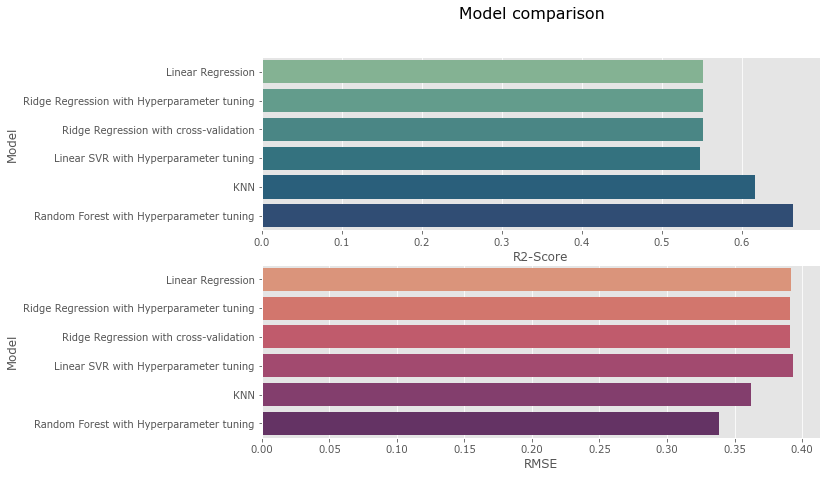

In [67]:
# Plotting the evalution metrics for all models for comparison
fig, ax = plt.subplots(2, 1, figsize = (10, 7))
fig.suptitle('Model comparison', fontsize=16)

# R2_score barplot
sns.barplot(metrics_df.R2_Score, metrics_df.Models, ax = ax[0], palette = 'crest')
ax[0].set_xlabel('R2-Score')
ax[0].set_ylabel('Model')

# RMSE barplot
sns.barplot(metrics_df.RMSE, metrics_df.Models, ax = ax[1], palette = 'flare')
ax[1].set_xlabel('RMSE')
ax[1].set_ylabel('Model')

We can see that the performance of **linear regression, ridge regression with  hyperprameter tuning, and Linear SVR with hyperparameter tuning** is pretty low with an R2-score or 0.55, i.e., the model explains only 55% of variability in the target variable. The RSME score measured for these three models are also about the same with a value of 0.39. The reason behind this is that linear models are oversimplified for our dataset, thus making it unsuitable. 

The second best performing model is **KNN**, which is a non-parametric supervised machine learning algorithm that makes no assumptions about the distribution of the data. It works by finding the distance and similarity to other available data points. Its main disadvantages are that it is computationally quite inefficient. 

**Random forest with hyperparameter tuning** has the lowest RSME value of 0.33, and has the highest R2-score of 0.66. It clearly is the best performing model here. It can be inferred that the relationship between predictors and target variables is non-linear. Random forest model reduces the probability of overfitting by averaging the prediction results of a diverse set of parallely generated trees. The drawback with random forest is that it takes a substaintial amount of hyperparameter tuning to get the optimal parameter for training, and is computationally intensive.  

### 6. Results

We plot a scatterplot to visualize the predictions vs actual values.

Text(0, 0.5, 'Predicted price')

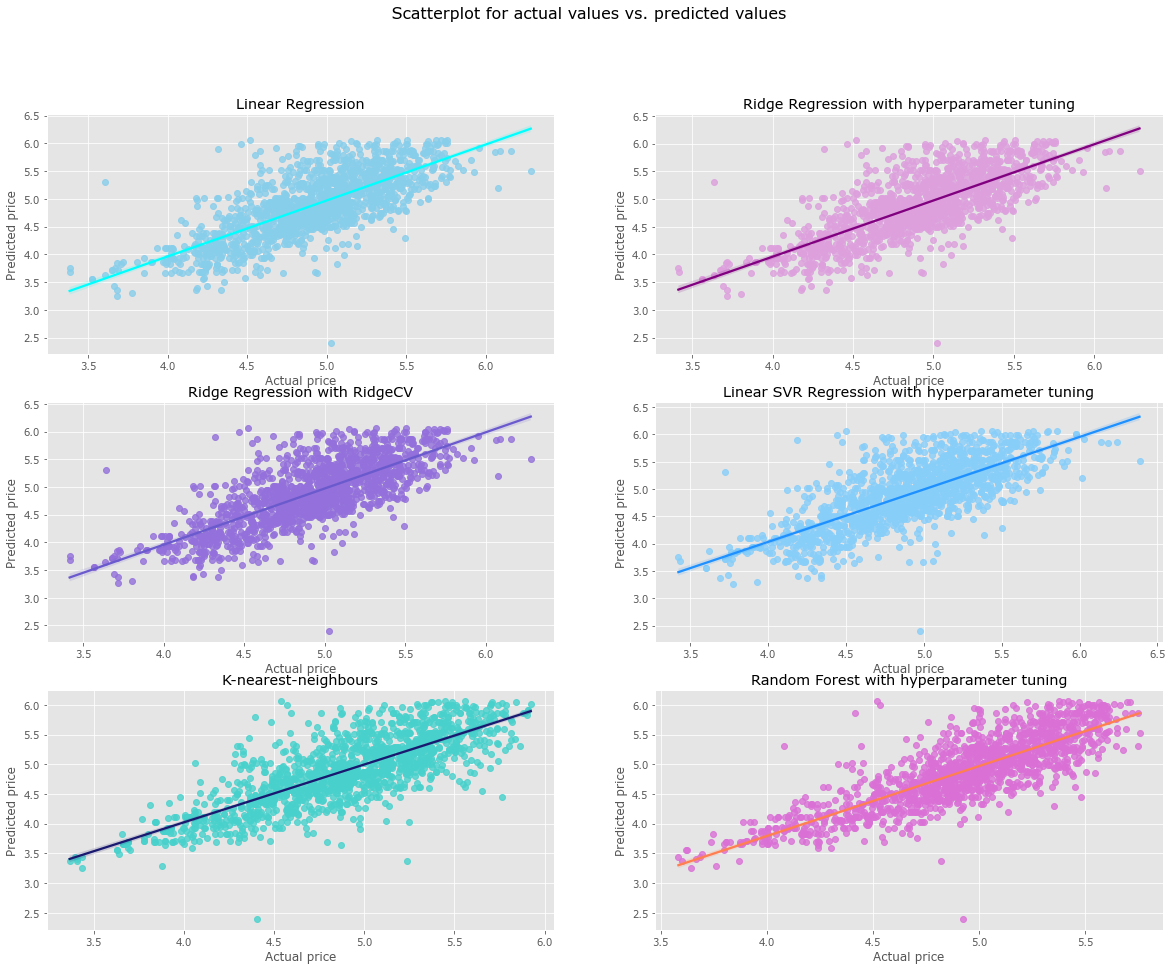

In [68]:
# Plotting true values vs regression predictions
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (20, 15))
fig.suptitle(' Scatterplot for actual values vs. predicted values', fontsize=16)

# Linear Regression
sns.regplot(x = lin_y_pred , y= y_test, scatter = True, ax=ax1, scatter_kws={"color": "skyblue"}, line_kws={"color": "cyan"})
ax1.set_title('Linear Regression')
ax1.set_xlabel('Actual price')
ax1.set_ylabel('Predicted price')

# Ridge Regression with hyperparameter tuning
sns.regplot(x = ridge_y_pred, y= y_test, scatter = True, ax=ax2, scatter_kws={"color": "plum"}, line_kws={"color": "purple"})
ax2.set_title('Ridge Regression with hyperparameter tuning')
ax2.set_xlabel('Actual price')
ax2.set_ylabel('Predicted price')

# RidgeCV
sns.regplot(x = ridgecv_pred , y= y_test, scatter = True, ax = ax3, scatter_kws={"color": "mediumpurple"}, line_kws={"color": "slateblue"})
ax3.set_title('Ridge Regression with RidgeCV')
ax3.set_xlabel('Actual price')
ax3.set_ylabel('Predicted price')

# Linear SVR with hyperparameter tuning
sns.regplot(x = svr_y_pred , y= y_test, scatter = True, ax = ax4, scatter_kws={"color": "lightskyblue"}, line_kws={"color": "dodgerblue"})
ax4.set_title('Linear SVR Regression with hyperparameter tuning')
ax4.set_xlabel('Actual price')
ax4.set_ylabel('Predicted price')

# K-nearest-neighbours
sns.regplot(x = knn_y_pred , y= y_test, scatter = True, ax = ax5, scatter_kws={"color": "mediumturquoise"}, line_kws={"color": "midnightblue"})
ax5.set_title('K-nearest-neighbours')
ax5.set_xlabel('Actual price')
ax5.set_ylabel('Predicted price')

# Random Forest with hyperparameter tuning
sns.regplot(x = random_forest_preds , y= y_test, scatter = True, ax = ax6, scatter_kws={"color": "orchid"}, line_kws={"color": "coral"})
ax6.set_title('Random Forest with hyperparameter tuning')
ax6.set_xlabel('Actual price')
ax6.set_ylabel('Predicted price')

### 7. Conclusion

We evaluated R2-score and RMSE using 5 different kinds of models for the Airbnb price prediction for San Francisco problem.  The prediction results could possibly have been better if there were more predictor variables, such as the number of rooms, bathrooms, proximity to tourist spots, proximity to local transport, etc. Random Forest and KNN were found to be the best performing models.

### 8. References:
1. https://machinelearninghd.com/ridgecv-regression-python/
2. https://medium.com/analytics-vidhya/predicting-airbnb-prices-in-los-angeles-14758afc47e
3. https://towardsdatascience.com/a-quick-and-dirty-guide-to-random-forest-regression-52ca0af157f8
4. https://www.mygreatlearning.com/blog/what-is-ridge-regression/
5. https://www.datatechnotes.com/2020/07/regression-example-with-linear-svr.html
6. https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
7. https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b
8. https://towardsdatascience.com/k-nearest-neighbours-explained-7c49853633b6#:~:text=Its%20main%20disadvantages%20are%20that,it's%20a%20memory%20based%20approach
9. https://www.forbes.com/sites/garybarker/2020/02/21/the-airbnb-effect-on-housing-and-rent/?sh=55934b1f2226